<a href="https://colab.research.google.com/github/chloevan/R_edu/blob/master/Chapter_0_1_Google_Colab_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "Google Colab with R"
date: 2020-06-05T12:20:30+09:00
tags:
  - "Google Colab"
  - "R"
  - "Development Settings"
categories:
  - "Google Colab"
  - "R"
  - "Development Settings"
menu: 
  python:
    name: Google Colab with R
---


## I. 들어가며
- 빅데이터 시대에 맞춰서 다양한 툴이 나오는 가운데, Google Colab은 가히 혁명적이라 할 수 있다. 
- 과거 높은 사양의 컴퓨터에서만 수행할 수 있었던 머신러닝과 딥러닝을 구글 코랩의 환경에서 무료로 배울 수 있는 기회를 구글이 제공하기 시작했다. 
- 간단하게 아래 소스코드를 실행하여 CPU와 GPU의 연산속도를 비교 해보자. 
  + [GPU를 사용한 TensorFlow](https://colab.research.google.com/notebooks/gpu.ipynb)



## II. Google Colab with R
- Google Colab은 매우 편리하다. 실제 강의를 시작하면서 `파이썬` 관련 모든 강의안은 Google Colab으로 제작중이다. 
- 문제는 현재로써는 `Google Colab`만 지원한다는 점이다. 
- `RStudio`가 개발용으로 매우 훌륭한 도구이지만, 교육 목적으로는 조금 부족한 감이 있다. 
- 일단 환경이 다르면 강의하는 입장에서는 여러가지로 어렵다. 
- 그래서 이번에 온라인 `Tutorial`을 제작하면서, `Google Colab`에서 `R`을 실행하고 또한 이를 바탕으로 강의를 제작하기로 했다. 
 

## III. Set up
- 다음 소스코드를 그대로 실행한다.

In [2]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


- 간단한 `EDA`는 `Jupyter`에서 실행할 수 있다. 

## IV. R 소스코드 실행
- 이제 간단하게 R 소스코드를 실행해보자. 
- 이 때, 임시적으로 `%%R` 매직 command를 활용한다. 

### (1) 패키지 설치
- R에서 필요한 필수 패키지를 설치한다. 
- `EDA`를 위한 `tidyverse` 패키지와 머신러닝을 위한 `caret`패키지를 설치한다. 

In [3]:
%%R
# 1. 패키지가 설치 function
install_pkgs <- function(pkg){
  new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
  if (length(new.pkg)) 
    install.packages(new.pkg, dependencies = TRUE)
  sapply(pkg, require, character.only = TRUE)
}

pkgs <- c("tidyverse", "nycflights13", "mlbench")
install_pkgs(pkgs)

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/nycflights13_1.0.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 4504590 bytes (4.3 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =

   tidyverse nycflights13      mlbench 
        TRUE         TRUE         TRUE 


### (2) EDA with tidyverse
- `tidyverse` 패키지를 활용하여 간단한 `EDA`를 작업해보자. 

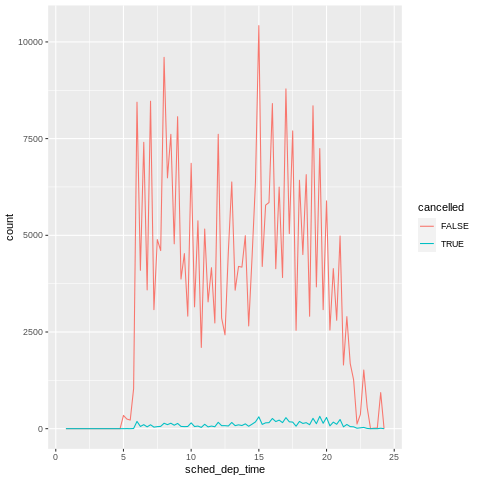

In [4]:
%%R
nycflights13::flights %>% 
  mutate(
    cancelled = is.na(dep_time),
    sched_hour = sched_dep_time %/% 100,
    sched_min = sched_dep_time %% 100,
    sched_dep_time = sched_hour + sched_min / 60
  ) %>% 
  ggplot(mapping = aes(sched_dep_time)) + 
    geom_freqpoly(mapping = aes(colour = cancelled), binwidth = 1/4)

## V. 결론
- 막상 설치를 해보면서 느낀 것이 있다면, 이렇게 `rp2`를 활용하여 `R`을 작업하는 것이 현명한 것 같지는 않아 보인다.
  + `%%` 매직 명령어를 쓰는게 불편했다. 
  + 패키지 관리가 파이썬에 비해서 쉽지 않을 것 같다는 생각이 든다. 
  + 머신러닝 패키지를 설치하는데, 꽤나 많은 시간이 소요 되었다. 
- `Stackoverflow`에 링크된 모든 문서를 테스트해본 결과 아직까지는 환경설정이 불안정한 것 같다. 
- 만약에, Google Colab에서 R을 꼭 사용하고 싶다면 아래 노트북을 복사해서 계속 사용하는 방안을 추천한다. 
  + https://colab.research.google.com/#create=true&language=r
  + EDA 뿐만 아니라 머신러닝 패키지도 제법 잘 돌아간다. 
- 패키지 관리가 문제인데, 현재로써는 `system()`를 사용하는 방법이 유력해 보이지만, 초보자분들 대상으로 강의시에는 적합하지 않은 것 같다. 
- 강의용으로는 적합하지만, 강의용을 `.RMD`파일로 변환해서 수강생이 직접 `.RMD` 파일로 받도록 하는 것이 가장 좋을 것 같다는 생각을 해본다. 

  

## VI. Reference
Stackoverflow. How to use R with Google Colaboratory? Retrieved from https://stackoverflow.com/questions/54595285/how-to-use-r-with-google-colaboratory